In [782]:
import numpy as np
import matplotlib.pyplot as plt

In [783]:
from keras.datasets import mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

training_images,test_images = training_images.astype('float32')/255,test_images.astype('float32')/255

#converting labels into arrays
training_labels1 = [np.array([[int(a==b)] for a in range(10)])for b in training_labels]
test_labels1 = [np.array([[int(a==b)] for a in range(10)])for b in test_labels]
#converting images into 1d
training_images1 = [a.reshape((784,1)) for a in training_images]
test_images1 = [a.reshape((784,1)) for a in test_images]

In [805]:
class model:

    #Initializing Model
    def __init__(self,layers):
        self.layers = layers
        self.weightShape = [(a,b) for a,b in zip(layers[1:],layers[:-1])]
        self.weights =[np.random.standard_normal(shape)/shape[1]**.5 for shape in self.weightShape]
        self.biases = [np.zeros((c,1)) for c in layers[1:]]

####################################################################  
    
    #Simply Predicting a thing
    def predict(self,a):
        for w,b in zip(self.weights,self.biases):
            a = self.sigmoid(np.matmul(w,a) + b)
        return a

####################################################################

    #Returning the output as a number
    def predictnumber(self,a):
        for w,b in zip(self.weights,self.biases):
            a = self.sigmoid(np.matmul(w,a) + b)
        return np.argmax(a)

####################################################################

    #Training the model
    def train(self,train_images,train_labels,trainingRate,iterations):
        
        weights_f,biases_f = self.weights.copy(),self.biases.copy()
        weights_f.reverse()
        biases_f.reverse()


        backWeights_f,backbiases_f = [np.ones(a.shape) for a in self.weights], [np.ones(a.shape) for a in self.biases]
        backWeights_f.reverse()
        backbiases_f.reverse()

        dcda_f = np.flip([np.zeros((lsize,1)) for lsize in self.layers])

        losses = []

        for i in range(len(train_images)):

            image,label = train_images[i],train_labels[i]

            # print(r)
            # print(image.shape)

            #Find the activations and zs
            a_f,z_f = self.z_activations(image)
            a_f.reverse()
            z_f.reverse()
        
            loss = self.error(a_f[0],label)
            losses.append(loss)

            dcda_f[0] = -1*label/a_f[0]*loss

            for i in range(len(backWeights_f)):
                backbiases_f[i] = self.d_sigmoid(z_f[i])*dcda_f[i]
                backWeights_f[i] =  np.matmul(self.d_sigmoid(z_f[i])*dcda_f[i],a_f[i+1].T)   
                dcda_f[i+1] = (1/len(dcda_f[i]))*np.matmul(weights_f[i].T,(self.d_sigmoid(z_f[i])*dcda_f[i]))
            
            backWeights_f.reverse()
            backbiases_f.reverse()

            dbackweight = [a*trainingRate*(-1) for a in backWeights_f]
            dbackbiases = [a*trainingRate*(-1) for a in backbiases_f]
            
            self.weights= [(a+b) for a,b in zip(self.weights,dbackweight)]
            self.biases = [(a+b) for a,b in zip(self.biases,dbackbiases)]

        plt.plot(losses)

        return

####################################################################

    def accuracy(self,testimage,testlabel):
        numbers = [self.predictnumber(a) for a in testimage]
        answers = [b for b in testlabel]
        right = [a==b for a,b in zip(numbers,answers)] 
        accur = sum(right)/len(testimage)
        return accur

####################################################################

    #Returning activations and z
    def z_activations(self,x):
        activ= []
        z=[]
        activ.append(x)
        z.append(x)

        for w,b in zip(self.weights,self.biases):
            x = np.matmul(w,x) + b
            z.append(x)
            x=self.sigmoid(x)
            activ.append(x)

        return activ,z

####################################################################
    
    @staticmethod
    def predictarray(self,a):
        pred = [np.zeros((lsize,1)) for lsize in self.layers]
        pred[0] = a
        for i in range(1,len(pred)-1):
            pred[i] = np.matmul(self.weights[i-1],pred[i-1]+self.biases[i-1])
            pred[i] = self.sigmoid(pred[i])
        return pred

####################################################################

    @staticmethod
    def sigmoid(x):
        return 1/(1+np.exp(-x))
    
####################################################################

    @staticmethod
    def d_sigmoid(x):
        return np.exp(-x)*(1/(1+np.exp(-x)))**2
    
####################################################################

    @staticmethod
    def error(x,answer):
        err = (x-answer)**2
        # err = -1*answer*np.log(x)
        return np.sum(err)

####################################################################

    @staticmethod
    def d_error(x,answer):
        d_err = 2*(x-answer)
        # d_err = -answer/x
        return np.sum(d_err)

    # #Softmax
    # @staticmethod
    # def softmax(x):
    #     exp_element=np.exp(x-x.max())
    #     return exp_element/np.sum(exp_element,axis=0)

    # #derivative of softmax
    # @staticmethod
    # def d_softmax(x):
    #     exp_element=np.exp(x-x.max())
    #     return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [806]:
#Initializing model
layers = (784,300,10)
network = model(layers)

In [807]:
print(network.accuracy(training_images1,training_labels))

0.09871666666666666


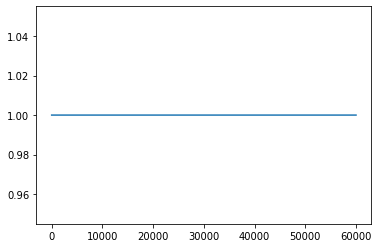

In [803]:
network.train(training_images1,training_labels1,0.001,10000)

In [804]:
print(network.accuracy(training_images1,training_labels))

0.09751666666666667
